<a href="https://colab.research.google.com/github/MasterSlyer10/CSMODEL/blob/main/MCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Descriptive Analysis of Stroke Patients Based on Health Indicators and Lifestyle Circumstances
  
### CSMODEL Case Study

Joseph Eusebio (S15)
Kenwin Reyes (S15)

In [59]:
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

## Dataset Description



### What is a Stroke?

A stroke is a life-threatening medical condition that occurs when the blood supply to part of the brain is interrupted or reduced. This prevents brain tissue from getting oxygen and nutrients, causing brain cells to die. The interruption of blood flow can be due to a blocked artery or leaking or bursting of a blood vessel.

### Dataset Used

The dataset we are using is called "[Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)" and it is used to predict a patients likelihood of experiencing a stroke based on parameters such as their gender, age, health condition they may have, as well as their lifestyle circumstances.

### Data Collection
The dataset used in this research was obtained from a confidential source. Due to the confidential nature of the data, details about the specific source are not disclosed to maintain privacy and adhere to the terms of use. The data is intended for educational purposes only, and any utilization for research purposes requires proper crediting to the author, as specified by the source.

The dataset is from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data   

By the author: Federico Soriano Palacios  
LinkedIn: https://www.linkedin.com/in/federico-soriano-palacios/  
Kaggle: https://www.kaggle.com/fedesoriano  
Github: https://github.com/fedesoriano

In [2]:
stroke_df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Each row in the dataset is a patient and each column is a characteristic of each patient with the last column "stroke" being whether or not they had a stroke.

There are a total of 5110 observations and 12 variables in the dataset.

### Variable Description

The following descriptions of the variables are directly gotten from the source webpage of the dataset.

1. `id`: Unique identifier  
  
2. `gender`:   
"`Male`", "`Female`", or "`Other`" to specify the individuals gender  
  
3. `age`: Age of the patient  

4. `hypertension`:  
`1` If the patient has hypertension  
`0` If the patient has no hypertension  

5. `heart_disease`:  
`1` If the patient has heart disease  
`0` If the patient has no heart disease  

6. `ever_married`:  
"`No`" or "`Yes`" if the person has married  

7. `work_type`:  
"`children`", "`Govt_jov`", "`Never_worked`", "`Private`", or "`Self-employed`"  

8. `Residence_type`:  
"`Rural`" or "`Urban`"  

9. `avg_glucose_level`: average glucose level in the blood of the patient  

10. `bmi`: body mass index of the patient  

11. `smoking_status`:  
"`formerly smoked`", "`never smoked`", "`smokes`", or "`Unknown`" meaning information of the patient was not available  

12. `stroke`:  
`1` If the patient had a stroke  
`0` If the patient didn't have a stroke


## Data Cleaning

### Checking for any null values



In [4]:
stroke_df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [5]:
stroke_df['bmi'].isnull().sum()

201

In [6]:
stroke_df.shape

(5110, 12)

Dropping observations with null values for "bmi"

In [7]:
stroke_df = stroke_df.dropna(subset='bmi')

The reason why we are dropping observations with a null bmi in the dataset about stroke prediction is because the body mass index (BMI) is an important health indicator that can affect the likelihood of experiencing a stroke. Since the dataset is used to predict a patient's likelihood of experiencing a stroke based on various health indicators, including BMI, it is important to have complete data for this variable. Dropping observations with null values for BMI ensures that we have a complete dataset for analysis and modeling.

In [8]:
stroke_df.shape

(4909, 12)

In [9]:
stroke_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Setting "age" values to int by rounding up floats

In [10]:
stroke_df['age'] = stroke_df['age'].apply(lambda x: math.ceil(x))

In [11]:
stroke_df['age'] = stroke_df['age'].astype(int)

In [12]:
display(stroke_df.dtypes)

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Converting age to int and rounding to the ceiling is done to make the data more readable and easier to work with. Age is a discrete variable, so it makes sense to represent it as an integer rather than a float. Rounding the age values to the highest integer ensures that the data is still accurate while making it easier to understand and analyze. Additionally, many statistical methods require integer values, so rounding the age values to the nearest integer can make it easier to perform statistical analyses on the data.

### Dropping of the single observation with the "Other" value for gender

The reason why we are dropping the single observation with "Other" value for gender is because the dataset is used to predict a patient's likelihood of experiencing a stroke based on various health indicators, including gender. Since the "Other" value for gender is not a common value and there is only one observation with this value, it is difficult to accurately predict the likelihood of experiencing a stroke for patients with this value.

In [13]:
stroke_df = stroke_df[stroke_df['gender'] != 'Other']
stroke_df.shape

(4908, 12)

## Exploratory Data Analysis

### Summary Statistics

In [14]:
stroke_df_filtered = stroke_df[stroke_df['stroke'] == 1]
stroke_df.drop('id', axis=1).describe().drop('count')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
mean,42.879788,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.535885,0.288901,0.216954,44.425550,7.85432,0.201937
min,1.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


### How many observations in this dataset have had a stroke?

In [15]:
stroke_count = stroke_df['stroke'].value_counts()
stroke_count

stroke
0    4699
1     209
Name: count, dtype: int64

<Axes: xlabel='stroke'>

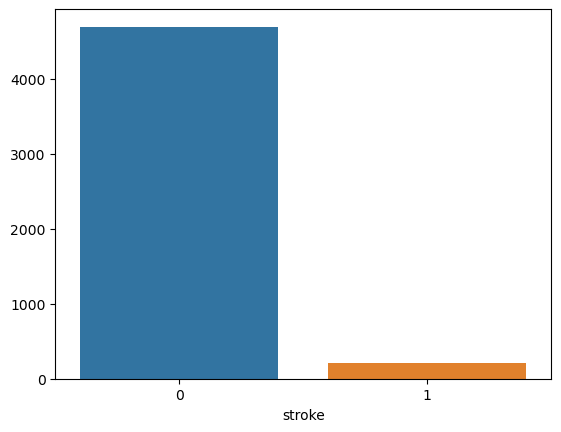

In [16]:
sns.barplot(x=stroke_count.index, y=stroke_count.values)

__Insights__  

As we can see from the data, the amount of observations in the dataset with stroke is much smaller than that of observations without. This may lead to some problems later on so it would be best to keep this in mind when analyzing the dataset.

### What are the distributions of numerical variables across the dataset?

This section delves into the distributions of each variables, this also takes into account the distributions of these variables in relation to stroke. This means that we will also be looking into the distributions of observations with stroke only. 


1. a.  __AGE ACROSS ENTIRE OBSERVATIONS__

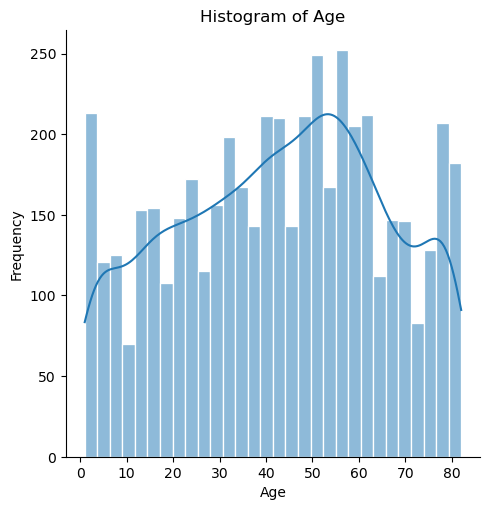

In [17]:
warnings.filterwarnings('ignore')

sns.displot(stroke_df['age'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')


plt.show()


1. b. __AGE AMONG OBSERVATIONS WITH STROKE__

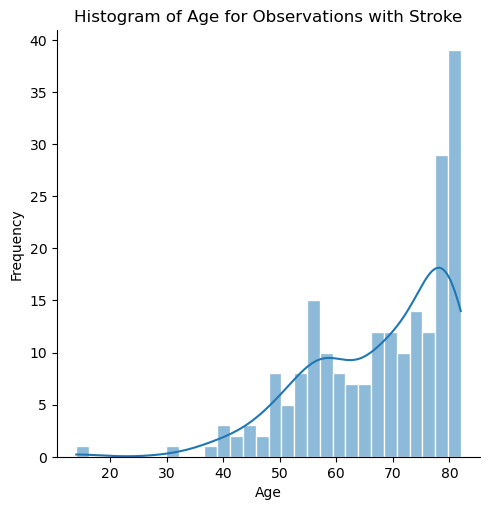

In [18]:
sns.displot(stroke_df_filtered['age'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for Observations with Stroke')

plt.show()


1. c. __Insights__

Based on the histograms created, we can notice that they don' quite look normally distributted. We can also see that majority of the patients being from ages 40 and above. The histogram of age for observations with stroke shows that the majority of patients who had a stroke were above the age of 60. This suggests that age is a significant factor in the likelihood of experiencing a stroke.

5. a. __BMI ACROSS ALL OBSERVATIONS__

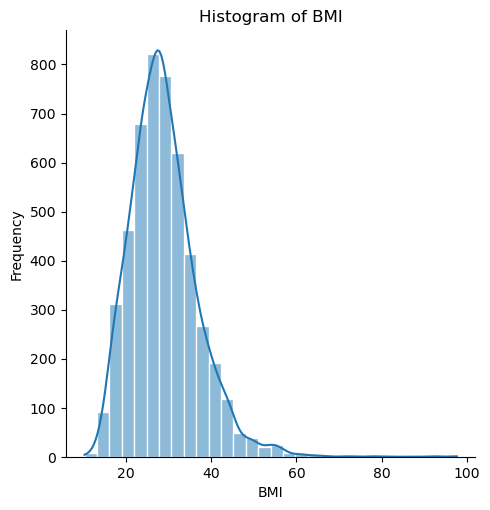

In [19]:
sns.displot(stroke_df['bmi'], bins=30, kde=True, edgecolor='white')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()


5. b. __BMI ACROSS OBSERVATIONS WITH STROKE__

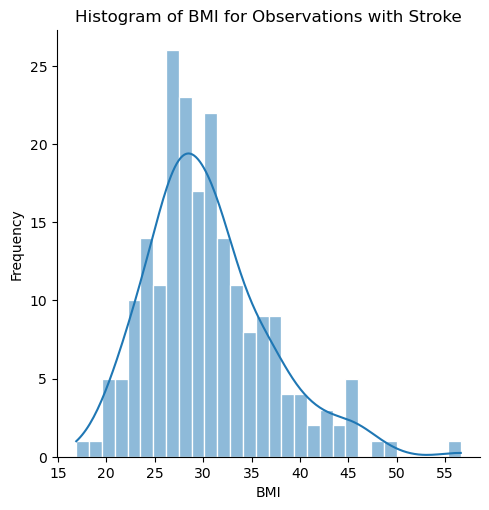

In [20]:
sns.displot(stroke_df_filtered['bmi'], bins=30, kde=True, edgecolor='white')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI for Observations with Stroke')
plt.show()


5. c. __Insights__  
  
The results show us that both distributions look like they are positively skewed. We can also notice that the majority of the observations for both distributions also fall in the same range which is around 30.

6. a. __AVG GLUCOSE LEVEL ACROSS ENTIRE OBSERVATIONS__

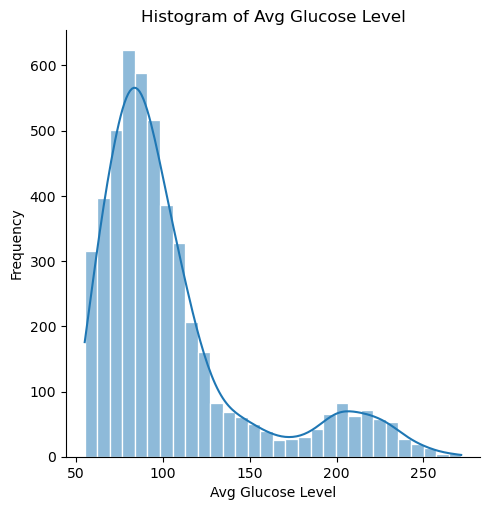

In [21]:
sns.displot(stroke_df['avg_glucose_level'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Glucose Level')
plt.show()

6. b. __AVG GLUCOSE LEVELS ACROSS OBSERVATIONS WITH STROKE__

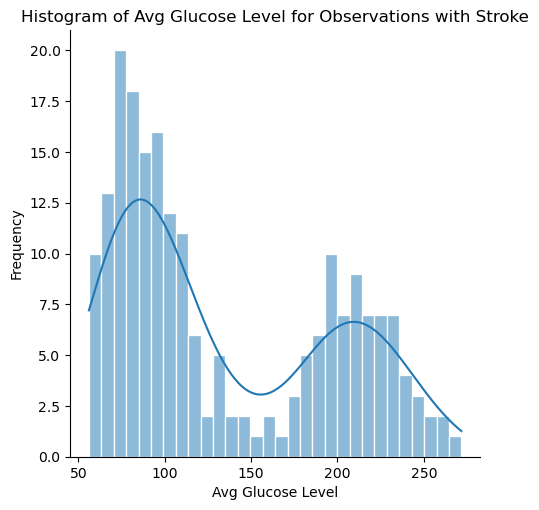

In [22]:
sns.displot(stroke_df_filtered['avg_glucose_level'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Glucose Level for Observations with Stroke')
plt.show()

6. c. __Insights__  
  
Just like with BMI we can notice a similar pattern among the 2 distributions which seem to suggest that these factors both BMI and Average glucose levels may not be as significant when comparing it to the distribution of Age between the entire population and those with only stroke wherein the two distributions look very different from each other.

### What are the Proportions of Categorical Variables in the Stroke Dataset?

In this section we'll delve into the different proportions of the categorical variables found in the dataset, and just like the previous section we will also be including these variable in relation with stroke.

1. a. __HYPERTENSION__

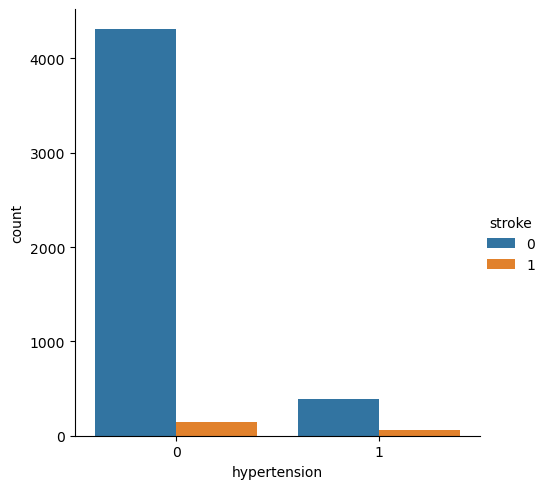

In [23]:
sns.catplot(x='hypertension', hue='stroke', data=stroke_df, kind='count')
plt.show()

In [24]:
stroke_df['hypertension'].value_counts()

hypertension
0    4457
1     451
Name: count, dtype: int64

In [25]:
proportion = stroke_df['hypertension'].value_counts()[1] / stroke_df.shape[0]
print(f"{proportion*100:.2f}% of patients in the dataset have hypertension")

9.19% of patients in the dataset have hypertension


In [26]:
stroke_df_filtered['hypertension'].value_counts()

hypertension
0    149
1     60
Name: count, dtype: int64

In [27]:
proportion = stroke_df_filtered['hypertension'].value_counts()[1] / stroke_df_filtered.shape[0]
print(f"{proportion*100:.2f}% of patients with stroke have hypertension")

28.71% of patients with stroke have hypertension


1. b. __Insights__  

The results show us that the proportion of patients that experienced a stroke and have hypertension is higher at 28.71% compared to the overall proportion across the dataset of patients that have hypertension at 9.19%. This may suggest that hypertension is a significant factor in the likelihood of experiencing a stroke.


2. a. __GENDER__

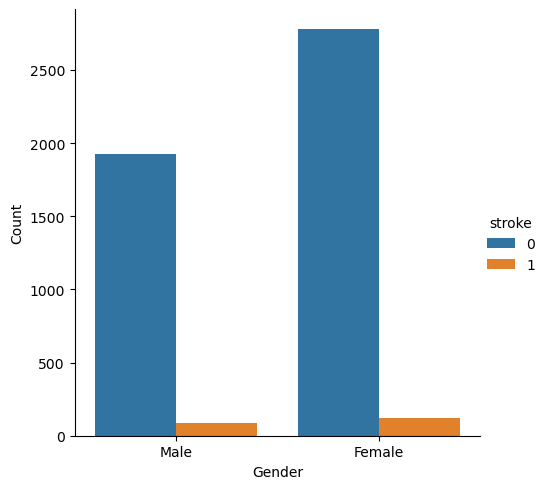

In [28]:
sns.catplot(x='gender', hue='stroke', data=stroke_df, kind='count')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [29]:
male_df = stroke_df[stroke_df['gender'] == 'Male']
male_stroke_df = male_df[male_df['stroke'] == 1]
proportion = male_stroke_df.shape[0] / male_df.shape[0]
print(f"The proportion of males in the dataset that had a stroke over the total males is {proportion:.2%}")



The proportion of males in the dataset that had a stroke over the total males is 4.43%


In [30]:
female_df = stroke_df[stroke_df['gender'] == 'Female']
female_stroke_df = female_df[female_df['stroke'] == 1]
proportion = female_stroke_df.shape[0] / female_df.shape[0]
print(f"The proportion of females in the dataset that had a stroke over the total females is {proportion:.2%}")


The proportion of females in the dataset that had a stroke over the total females is 4.14%


2. b. __Insights__  
  
There are more females overall in the dataset. And this is also true for observations with stroke only and those without stroke only. However the proportions of patients who got a stroke among these groups are roughly the same with the males having a 4.43% and females having a 4.14%

3. a. __HEART DISEASE__

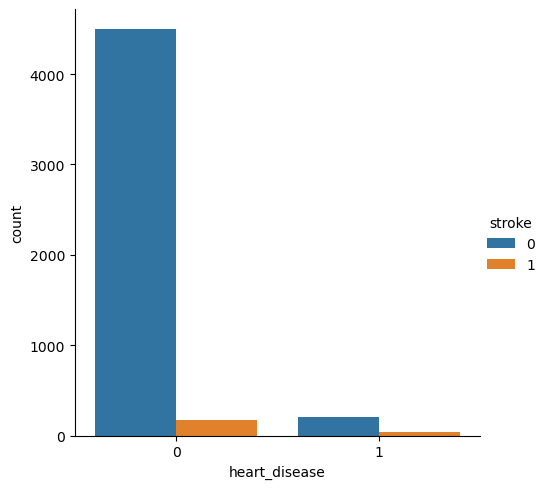

In [31]:
sns.catplot(x='heart_disease', hue='stroke', data=stroke_df, kind='count')
plt.show()

In [32]:
proportion = stroke_df['heart_disease'].value_counts()[1] / stroke_df.shape[0]
print(f"{proportion*100:.2f}% of patients in the dataset have heart disease")

4.95% of patients in the dataset have heart disease


In [33]:
proportion = stroke_df_filtered['heart_disease'].value_counts()[1] / stroke_df_filtered.shape[0]
print(f"{proportion*100:.2f}% of patients with stroke have heart disease")

19.14% of patients with stroke have heart disease


3. b. __Insights__  
  
A similar pattern can be noticed here with that of Hypertension

4. a. __EVER MARRIED__

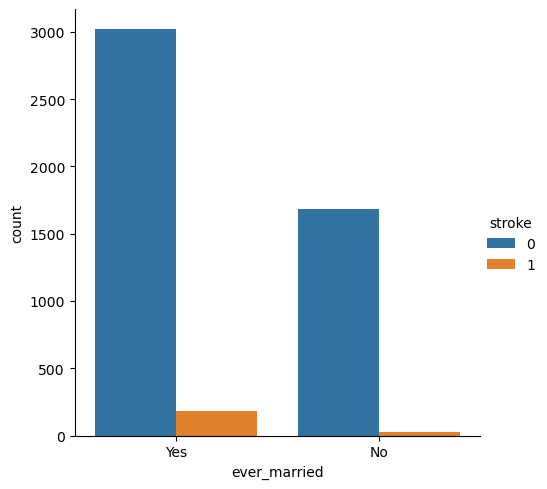

In [34]:
sns.catplot(x='ever_married', hue='stroke', data=stroke_df, kind='count')
plt.show()


5. a. __WORK TYPE__

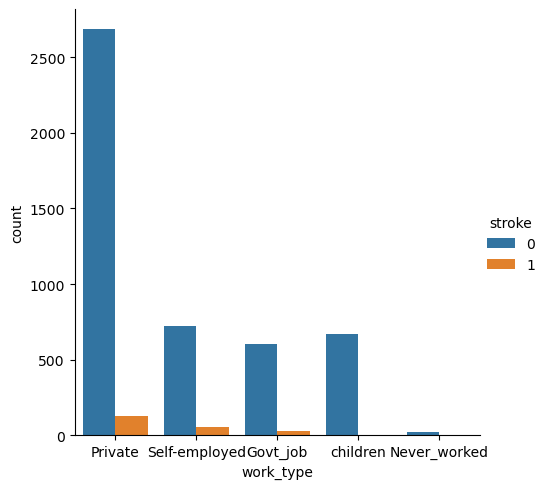

In [35]:
sns.catplot(x='work_type', hue='stroke', data=stroke_df, kind='count')
plt.show()

6. a. __RESIDENCE TYPE__

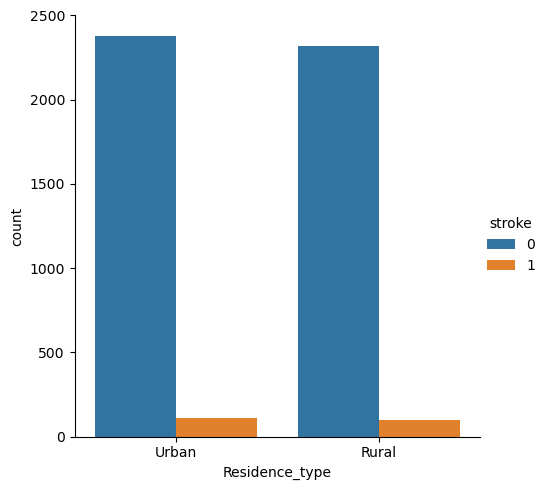

In [36]:
sns.catplot(x='Residence_type', hue='stroke', data=stroke_df, kind='count')
plt.show()

7. __General Insights__  
  
The distribution of marital status and residence type appears to offer limited insights into stroke-positive individuals. The distribution of residence type is nearly uniform, indicating no particular type of residence is predominantly associated with stroke-positive individuals. Similarly, the distribution of marital status is heavily skewed towards one value, suggesting that marital status may not be a significant factor in differentiating stroke-positive individuals.

### What are the Correlations Between Variables?

1.a Correlation matrix of health attributes to stroke

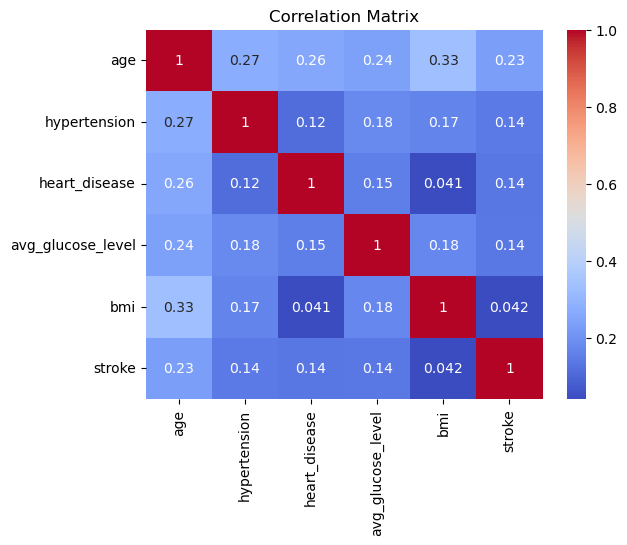

In [37]:
numeric_df = stroke_df.drop(['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)
corr_matrix = numeric_df.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1.b Correlation matrix of observations that do have a stroke and their health attributes

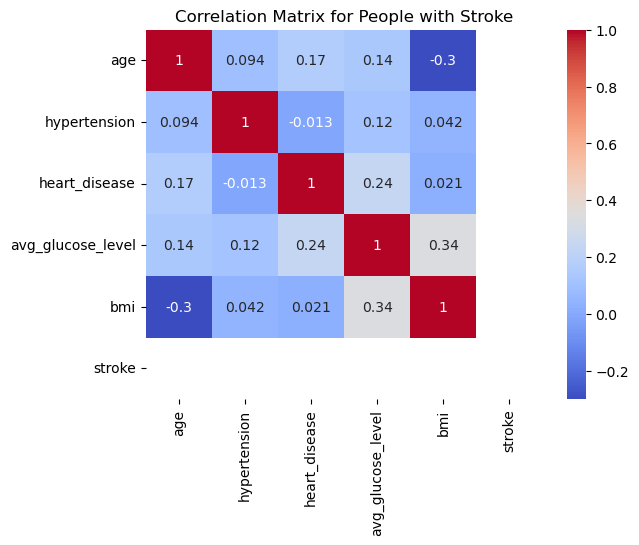

In [38]:
stroke_df_filtered = stroke_df[stroke_df['stroke'] == 1]

numeric_df = stroke_df_filtered.drop(['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

corr_matrix = numeric_df.corr()

# display correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for People with Stroke')
plt.show()


The correlation of the health atrributes of a stroke patient to other health attributes is mostly none to low positive correlation. The correlation of age and bmi actually has a low negative correlation. This shows that the body mass index of a stroke patient decreases as they get older. The correlation of body mass index and the average glucose level of a stroke patient has a low positive correlation. This shows that as the average glucose level of a stroke patient increases as their body mass index increases. The correlation of heart disease and the average glucose level of a stroke patient has also a low positive correlation. This shows that the occurrence of a heart disease and the increased average glucose level of a stroke patient is somewhat related.

In [39]:
stroke_df['stroke'].corr(stroke_df['avg_glucose_level'])

0.13898364739425242

The correlation of the average glucose level of a person to whether they had a stroke is none to low positive correlation

In [40]:
stroke_df['stroke'].corr(stroke_df['bmi'])

0.04234127718027811

The correlation of the body mass index of a person to whether they had a stroke is none to low positive correlation

In [41]:
stroke_df['hypertension'].corr(stroke_df['stroke'])

0.14250305423267232

The correlation of whether the person has hypertension to whether they had a stroke is none to low positive correlation

In [42]:
stroke_df['heart_disease'].corr(stroke_df['stroke'])

0.1379293391860053

The correlation of whether the person has a heart disease to whether they had a stroke is none to low positive correlation

In [43]:
stroke_df1 = stroke_df.copy()
stroke_df1['smoking_status'] = stroke_df1['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})

We replace the smoking_status variable to numerical values so that we can use correlation

In [44]:
stroke_df1['smoking_status'].value_counts()

smoking_status
0.0    1852
1.0     836
2.0     737
Name: count, dtype: int64

In [45]:
stroke_df1['smoking_status'].isnull().sum()

1483

We didn't map the 'unknown' values in the 'smoking_status' variable, making it mapped to NaN, which we plan to remove from the table

In [46]:
stroke_df1 = stroke_df1.dropna(subset='smoking_status')
stroke_df1['smoking_status'].isnull().sum()

0

Since there are no more null values, we can now proceed to correlation

In [47]:
stroke_df1['smoking_status'].corr(stroke_df1['stroke'])

0.022070642109878705

The correlation of whether the person never smoked, formerly smoked, or still smokes to whether they had a stroke is none to low positive correlation

Text(0, 0.5, 'Age')

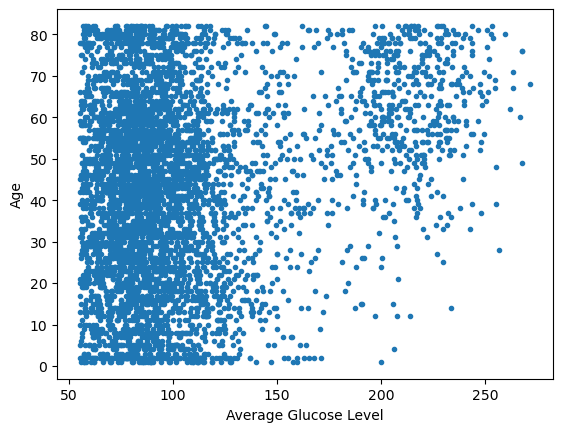

In [48]:
plt.plot(stroke_df['avg_glucose_level'], stroke_df['age'], '.')
plt.xlabel('Average Glucose Level')
plt.ylabel('Age')

In [49]:
stroke_df['avg_glucose_level'].corr(stroke_df['age'])

0.23609780011286263

The correlation of the average glucose level of the patient to their age is a low positive correlation

Text(0, 0.5, 'Age')

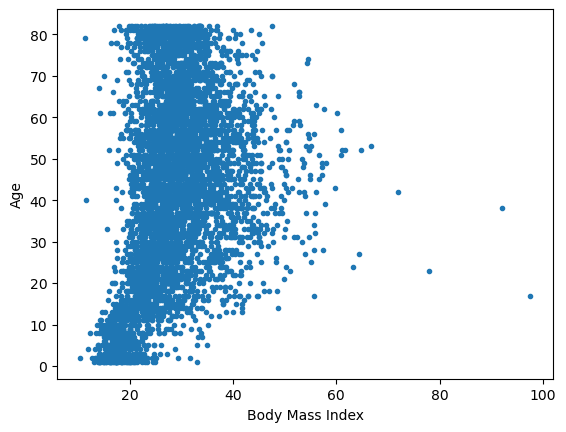

In [50]:
plt.plot(stroke_df['bmi'], stroke_df['age'], '.')
plt.xlabel('Body Mass Index')
plt.ylabel('Age')

In [51]:
stroke_df['bmi'].corr(stroke_df['age'])

0.33294793851041005

The correlation of the patient's body mass index to their age is a low positive correlation

## Research Question

### Can we categorize stroke patients based on their health indicators such as age, hypertension, heart disease, and average glucose levels, in relation to their lifestyle circumstances?


Through the exploratory data analysis of the stroke prediction dataset, we’ve gained insights into the complex relationships between various demographic and health-related variables and the likelihood of a stroke which lead us to our research question. By categorizing stroke patients into subgroups based on similarities to their health indicators and lifestyle circumstances, we can gain a more comprehensive understanding of the factors that contribute to stroke risk and develop more effective prevention and treatment strategies.

The research question is answerable by performing data mining techniques such as clustering or factor analysis, which are covered in class and can be used to identify subgroups of stroke patients based on their health indicators and lifestyle circumstances.

The research question is important and significant because stroke is a major cause of disability and death worldwide, and accurate identification of patient subgroups based on their health indicators and lifestyle circumstances can help healthcare providers to implement more targeted prevention and treatment strategies and improve patient outcomes.

## Data Modeling

In [52]:
stroke_df1['gender'] = stroke_df1['gender'].map({'Male': 0, 'Female': 1})
stroke_df1['ever_married'] = stroke_df1['ever_married'].map({'No': 0, 'Yes': 1})
stroke_df1['work_type'] = stroke_df1['work_type'].map({'children': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'Govt_job': 4})
stroke_df1['Residence_type'] = stroke_df1['Residence_type'].map({'Rural': 0, 'Urban': 1})

We converted our categorical variables to a numeric value so that we can include it our k-means clustering.


In [58]:
features = stroke_df1[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

Removing the 'id' variable from the features to be included in our k-means clustering.

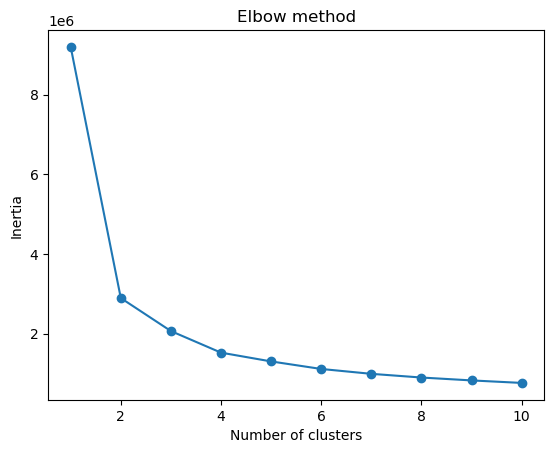

In [56]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "elbow" and is a good estimate for the best value for K based on our data. looking at the graph, the elbow method shows that 2 is a good value for K.

In [57]:
kmeans = KMeans(n_clusters=2, random_state=42)
stroke_df1['cluster'] = kmeans.fit_predict(features)

We use k-means clustering with a k value of 2. Then we store what cluster each data point is part of in another column in our dataframe called 'cluster'.